<a href="https://colab.research.google.com/github/harshelke180502/Tour_Package_Prediction/blob/main/Travel_Package_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


In [204]:
data = pd.read_csv('/content/tour_package.csv')
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [206]:
data.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [207]:
# data.dropna(subset=['Age', 'DurationOfPitch', 'TypeofContact','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome'], how='any', inplace=True)
# checked that by doing this method the no of entries were cut down from 4888 to 4182 which is a large loss of data

In [208]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['DurationOfPitch'].fillna(data['DurationOfPitch'].median(), inplace=True)
data['MonthlyIncome'].fillna(data['MonthlyIncome'].median(), inplace=True)


<ipython-input-208-97c3369191c1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-208-97c3369191c1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [210]:
data.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,25
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [211]:
data['NumberOfChildrenVisiting'].fillna(data['NumberOfChildrenVisiting'].mode()[0], inplace=True)
data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].mode()[0], inplace=True)
data['NumberOfFollowups'].fillna(data['NumberOfFollowups'].mode()[0], inplace=True)

<ipython-input-211-e7d83190f438>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['NumberOfChildrenVisiting'].fillna(data['NumberOfChildrenVisiting'].mode()[0], inplace=True)
<ipython-input-211-e7d83190f438>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [212]:
data.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,25
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [213]:
data.dropna(subset=['NumberOfTrips','TypeofContact'], how="any", inplace=True)

In [214]:
data.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [215]:
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4723 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4723 non-null   int64  
 1   ProdTaken                 4723 non-null   int64  
 2   Age                       4723 non-null   float64
 3   TypeofContact             4723 non-null   object 
 4   CityTier                  4723 non-null   int64  
 5   DurationOfPitch           4723 non-null   float64
 6   Occupation                4723 non-null   object 
 7   Gender                    4723 non-null   object 
 8   NumberOfPersonVisiting    4723 non-null   int64  
 9   NumberOfFollowups         4723 non-null   float64
 10  ProductPitched            4723 non-null   object 
 11  PreferredPropertyStar     4723 non-null   float64
 12  MaritalStatus             4723 non-null   object 
 13  NumberOfTrips             4723 non-null   float64
 14  Passport     

In [217]:
data["NumberOfTrips"] = data["NumberOfTrips"].astype(int)
data['NumberOfChildrenVisiting'] = data['NumberOfChildrenVisiting'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4723 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4723 non-null   int64  
 1   ProdTaken                 4723 non-null   int64  
 2   Age                       4723 non-null   float64
 3   TypeofContact             4723 non-null   object 
 4   CityTier                  4723 non-null   int64  
 5   DurationOfPitch           4723 non-null   float64
 6   Occupation                4723 non-null   object 
 7   Gender                    4723 non-null   object 
 8   NumberOfPersonVisiting    4723 non-null   int64  
 9   NumberOfFollowups         4723 non-null   float64
 10  ProductPitched            4723 non-null   object 
 11  PreferredPropertyStar     4723 non-null   float64
 12  MaritalStatus             4723 non-null   object 
 13  NumberOfTrips             4723 non-null   int64  
 14  Passport     

In [218]:
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1,1,2,1,0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2,0,3,1,2,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7,1,3,0,0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2,1,5,1,1,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1,0,5,1,0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2,1,1,1,1,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3,1,3,1,2,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7,0,1,1,3,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3,0,5,0,2,Executive,20289.0


In [219]:
data["Age"]=data["Age"].astype(int)
data["DurationOfPitch"]=data["DurationOfPitch"].astype(int)
data["MonthlyIncome"]=data["MonthlyIncome"].astype(int)
data["NumberOfFollowups"]=data["NumberOfFollowups"].astype(int)
data["PreferredPropertyStar"]=data["PreferredPropertyStar"].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4723 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CustomerID                4723 non-null   int64 
 1   ProdTaken                 4723 non-null   int64 
 2   Age                       4723 non-null   int64 
 3   TypeofContact             4723 non-null   object
 4   CityTier                  4723 non-null   int64 
 5   DurationOfPitch           4723 non-null   int64 
 6   Occupation                4723 non-null   object
 7   Gender                    4723 non-null   object
 8   NumberOfPersonVisiting    4723 non-null   int64 
 9   NumberOfFollowups         4723 non-null   int64 
 10  ProductPitched            4723 non-null   object
 11  PreferredPropertyStar     4723 non-null   int64 
 12  MaritalStatus             4723 non-null   object
 13  NumberOfTrips             4723 non-null   int64 
 14  Passport                  472

In [220]:
data["NumberOfFollowups"].unique()


array([3, 4, 2, 5, 1, 6])

In [221]:
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41,Self Enquiry,3,6,Salaried,Female,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,200001,0,49,Company Invited,1,14,Salaried,Male,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,200002,1,37,Self Enquiry,1,8,Free Lancer,Male,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,200003,0,33,Company Invited,1,9,Salaried,Female,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,200004,0,36,Self Enquiry,1,8,Small Business,Male,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49,Self Enquiry,3,9,Small Business,Male,3,5,Deluxe,4,Unmarried,2,1,1,1,1,Manager,26576
4884,204884,1,28,Company Invited,1,31,Salaried,Male,4,5,Basic,3,Single,3,1,3,1,2,Executive,21212
4885,204885,1,52,Self Enquiry,3,17,Salaried,Female,4,4,Standard,4,Married,7,0,1,1,3,Senior Manager,31820
4886,204886,1,19,Self Enquiry,3,16,Small Business,Male,3,4,Basic,3,Single,3,0,5,0,2,Executive,20289


In [222]:
data['Gender'].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [223]:
data["TypeofContact"].unique()

array(['Self Enquiry', 'Company Invited'], dtype=object)

In [224]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to a column (e.g., Gender)

# data['TypeofContact'] = label_encoder.fit_transform(data['TypeofContact'])
# data

In [225]:
data["Gender"].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [226]:
data["Occupation"]

,Occupation
0,Salaried
1,Salaried
2,Free Lancer
3,Salaried
4,Small Business
...,...
4883,Small Business
4884,Salaried
4885,Salaried
4886,Small Business


In [227]:
data.isnull().sum()
# # data.columns
# # data.columns
# from sklearn.preprocessing import OneHotEncoder

# # Initialize the encoder
# encoder = OneHotEncoder(drop='first')  # Use drop='first' to avoid dummy variable trap

# encoded_data = encoder.fit_transform(data[['ProductPitched']]).toarray()

# # Convert to a DataFrame and add back to the original data
# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['ProductPitched']))
# data = pd.concat([data, encoded_df], axis=1)

# data.isnull().sum()


,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [228]:
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41,Self Enquiry,3,6,Salaried,Female,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,200001,0,49,Company Invited,1,14,Salaried,Male,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,200002,1,37,Self Enquiry,1,8,Free Lancer,Male,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,200003,0,33,Company Invited,1,9,Salaried,Female,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,200004,0,36,Self Enquiry,1,8,Small Business,Male,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49,Self Enquiry,3,9,Small Business,Male,3,5,Deluxe,4,Unmarried,2,1,1,1,1,Manager,26576
4884,204884,1,28,Company Invited,1,31,Salaried,Male,4,5,Basic,3,Single,3,1,3,1,2,Executive,21212
4885,204885,1,52,Self Enquiry,3,17,Salaried,Female,4,4,Standard,4,Married,7,0,1,1,3,Senior Manager,31820
4886,204886,1,19,Self Enquiry,3,16,Small Business,Male,3,4,Basic,3,Single,3,0,5,0,2,Executive,20289


Return back here to check about the one hot encoding on Product Pitched

In [229]:
# from sklearn.preprocessing import OneHotEncoder

# # Initialize the encoder
# encoder = OneHotEncoder(handle_unknown='ignore')  # Use drop='first' to avoid dummy variable trap

# # Fit and transform the data
# encoded_data = encoder.fit_transform(data[['ProductPitched']]).toarray()

# # Convert to a DataFrame with the same index as original data
# encoded_df = pd.DataFrame(
#     encoded_data,
#     columns=encoder.get_feature_names_out(['ProductPitched']),
#     index=data.index  # Add this line to maintain index alignment
# )

# # Concatenate while preserving the original data
# data = pd.concat([data, encoded_df], axis=1)
# data.isnull().sum()

In [230]:
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41,Self Enquiry,3,6,Salaried,Female,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,200001,0,49,Company Invited,1,14,Salaried,Male,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,200002,1,37,Self Enquiry,1,8,Free Lancer,Male,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,200003,0,33,Company Invited,1,9,Salaried,Female,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,200004,0,36,Self Enquiry,1,8,Small Business,Male,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49,Self Enquiry,3,9,Small Business,Male,3,5,Deluxe,4,Unmarried,2,1,1,1,1,Manager,26576
4884,204884,1,28,Company Invited,1,31,Salaried,Male,4,5,Basic,3,Single,3,1,3,1,2,Executive,21212
4885,204885,1,52,Self Enquiry,3,17,Salaried,Female,4,4,Standard,4,Married,7,0,1,1,3,Senior Manager,31820
4886,204886,1,19,Self Enquiry,3,16,Small Business,Male,3,4,Basic,3,Single,3,0,5,0,2,Executive,20289


In [231]:
# data=data.drop("ProductPitched",axis=1)

In [232]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [233]:
# data = data.rename(columns={
#     'ProductPitched_Basic': 'Basic',
#     'ProductPitched_Deluxe': 'Deluxe',
#     'ProductPitched_King': 'King',
#     'ProductPitched_Standard': 'Standard',
#     'ProductPitched_Super Deluxe': 'SuperDeluxe',


# })
# data.info()

In [234]:
# data = data.astype({
#     'Basic': 'int',
#     'Deluxe': 'int',
#     'King': 'int',
#     'Standard': 'int',
#     'SuperDeluxe': 'int'
# })
# data.info()

In [235]:
# @title Default title text
data['Occupation'].unique()

array(['Salaried', 'Free Lancer', 'Small Business', 'Large Business'],
      dtype=object)

Return back here to check one hot encoding on occupation that was aborted


In [236]:
# @title Default title text
# encoder = OneHotEncoder(handle_unknown='ignore')
# # Fit and transform the data
# encoded_data_occupation = encoder.fit_transform(data[['Occupation']]).toarray()

# # Convert to a DataFrame with the same index as original data
# encoded_df_occupation = pd.DataFrame(
#     encoded_data_occupation,
#     columns=encoder.get_feature_names_out(['Occupation']),
#     index=data.index  # Add this line to maintain index alignment
# )

# # Concatenate while preserving the original data
# data = pd.concat([data, encoded_df_occupation], axis=1)
# data

In [237]:
data.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [238]:
# data = data.rename(columns={
#     'Occupation_Free Lancer': 'Free_Lancer',
#     'Occupation_Large Business': 'Large_Business',
#     'Occupation_Salaried': 'Salaried',
#     'Occupation_Small Business': 'Small_Business'



# })

# data.info()

In [239]:
# data=data.drop("Occupation",axis=1)
# data.info()

In [240]:
# data = data.astype({
#     'Free_Lancer': 'int',
#     'Large_Business': 'int',
#     'Salaried': 'int',
#     'Small_Business': 'int',

# })

# data.info()

In [241]:
data['Designation'].unique()

array(['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP'],
      dtype=object)

In [242]:
data["MaritalStatus"].unique()

array(['Single', 'Divorced', 'Married', 'Unmarried'], dtype=object)

In [243]:
len(data["CustomerID"].unique())

4723

In [244]:
data.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [245]:
data


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41,Self Enquiry,3,6,Salaried,Female,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,200001,0,49,Company Invited,1,14,Salaried,Male,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,200002,1,37,Self Enquiry,1,8,Free Lancer,Male,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,200003,0,33,Company Invited,1,9,Salaried,Female,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,200004,0,36,Self Enquiry,1,8,Small Business,Male,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49,Self Enquiry,3,9,Small Business,Male,3,5,Deluxe,4,Unmarried,2,1,1,1,1,Manager,26576
4884,204884,1,28,Company Invited,1,31,Salaried,Male,4,5,Basic,3,Single,3,1,3,1,2,Executive,21212
4885,204885,1,52,Self Enquiry,3,17,Salaried,Female,4,4,Standard,4,Married,7,0,1,1,3,Senior Manager,31820
4886,204886,1,19,Self Enquiry,3,16,Small Business,Male,3,4,Basic,3,Single,3,0,5,0,2,Executive,20289


In [246]:
data["Gender"].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

In [247]:
data.loc[data["Gender"]=="Fe Male","Gender"]="Binary"
data["Gender"].unique()

array(['Female', 'Male', 'Binary'], dtype=object)

In [248]:
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41,Self Enquiry,3,6,Salaried,Female,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,200001,0,49,Company Invited,1,14,Salaried,Male,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,200002,1,37,Self Enquiry,1,8,Free Lancer,Male,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,200003,0,33,Company Invited,1,9,Salaried,Female,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,200004,0,36,Self Enquiry,1,8,Small Business,Male,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49,Self Enquiry,3,9,Small Business,Male,3,5,Deluxe,4,Unmarried,2,1,1,1,1,Manager,26576
4884,204884,1,28,Company Invited,1,31,Salaried,Male,4,5,Basic,3,Single,3,1,3,1,2,Executive,21212
4885,204885,1,52,Self Enquiry,3,17,Salaried,Female,4,4,Standard,4,Married,7,0,1,1,3,Senior Manager,31820
4886,204886,1,19,Self Enquiry,3,16,Small Business,Male,3,4,Basic,3,Single,3,0,5,0,2,Executive,20289


In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4723 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CustomerID                4723 non-null   int64 
 1   ProdTaken                 4723 non-null   int64 
 2   Age                       4723 non-null   int64 
 3   TypeofContact             4723 non-null   object
 4   CityTier                  4723 non-null   int64 
 5   DurationOfPitch           4723 non-null   int64 
 6   Occupation                4723 non-null   object
 7   Gender                    4723 non-null   object
 8   NumberOfPersonVisiting    4723 non-null   int64 
 9   NumberOfFollowups         4723 non-null   int64 
 10  ProductPitched            4723 non-null   object
 11  PreferredPropertyStar     4723 non-null   int64 
 12  MaritalStatus             4723 non-null   object
 13  NumberOfTrips             4723 non-null   int64 
 14  Passport                  472

<ipython-input-250-2b1b7c1cb855>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette="Set1")
<ipython-input-250-2b1b7c1cb855>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette="Set1")
<ipython-input-250-2b1b7c1cb855>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette="Set1")
<ipython-input-250-2b1b7c1cb855>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `l

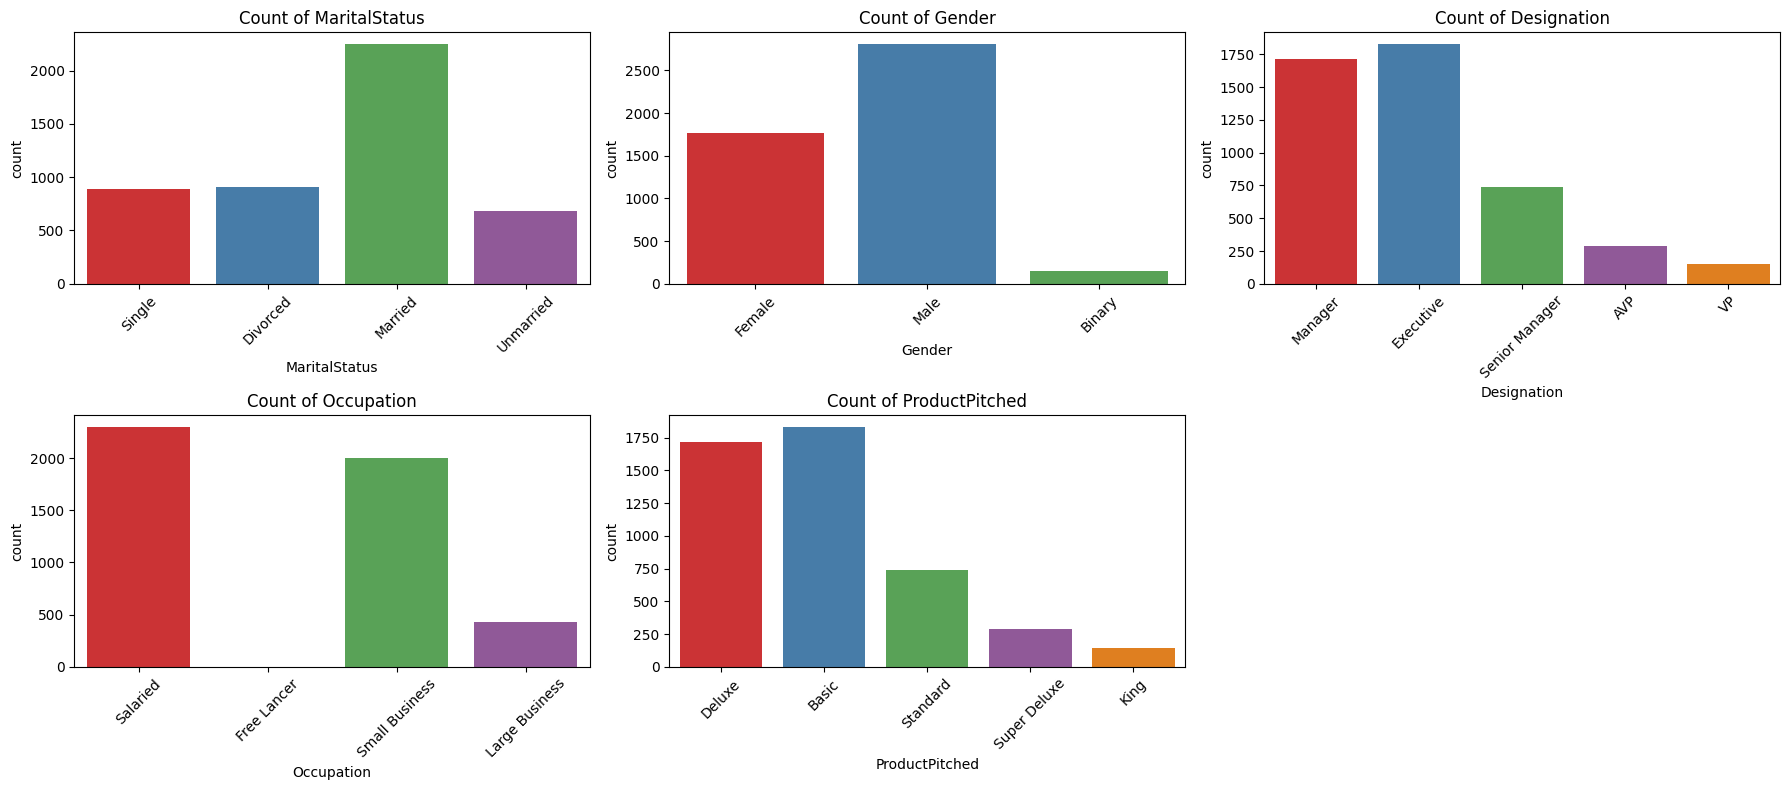

In [250]:
columns_to_plot = ["MaritalStatus", "Gender", "Designation","Occupation","ProductPitched"]

# Set the figure size for each plot
plt.figure(figsize=(18, 8))

# Iterate over each column and create a count plot
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2,3, i)  # Adjust the subplot to create a grid
    sns.countplot(x=column, data=data, palette="Set1")
    plt.title(f'Count of {column}')  # Title for each subplot
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

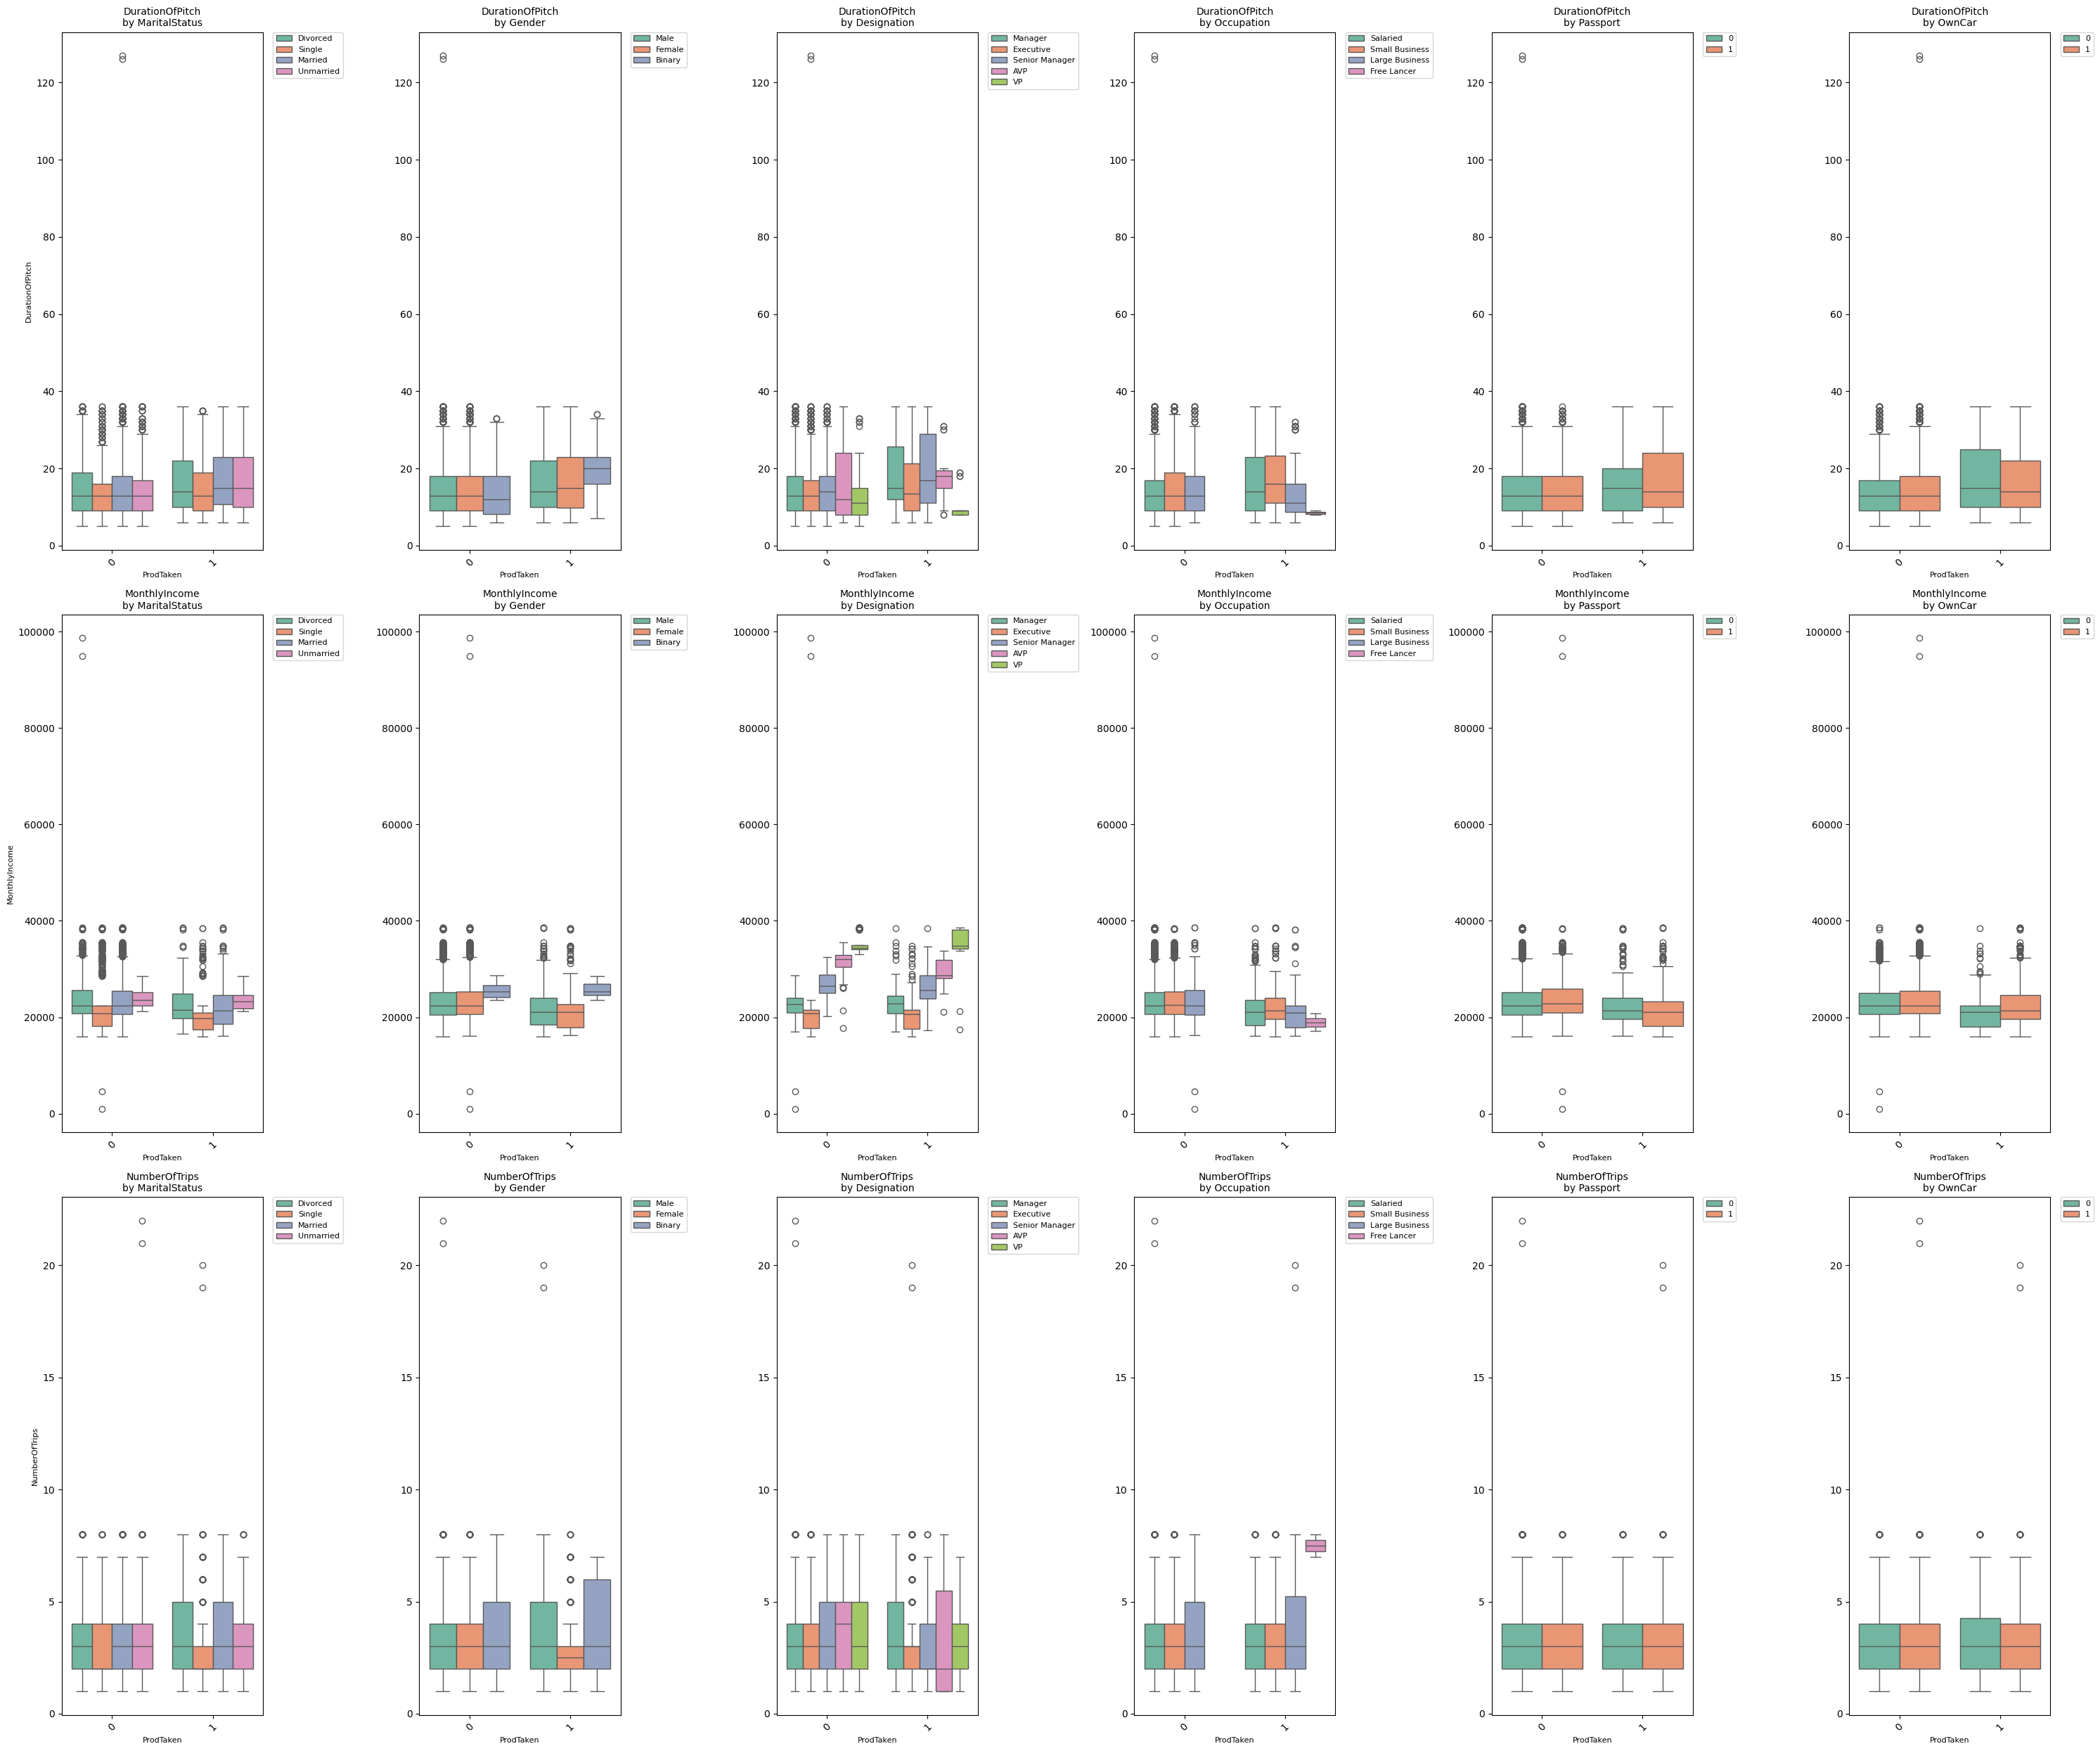

In [251]:
columns_on_y = ["DurationOfPitch", "MonthlyIncome", "NumberOfTrips"]
hue_features = ["MaritalStatus", "Gender", "Designation", "Occupation", "Passport","OwnCar"]

# Calculate total number of plots needed
total_plots = len(columns_on_y) * len(hue_features)

# Create figure with appropriate size
plt.figure(figsize=(30, 25))

# Counter for subplot positions
plot_number = 1

# Create boxplots for each combination
for y_col in columns_on_y:
    for hue_feature in hue_features:
        # Create subplot
        plt.subplot(len(columns_on_y), len(hue_features), plot_number)

        # Create boxplot
        sns.boxplot(x="ProdTaken", y=y_col, data=data, hue=hue_feature, palette="Set2")

        # Customize plot
        plt.title(f'{y_col}\nby {hue_feature}', fontsize=10)
        plt.xlabel("ProdTaken", fontsize=8)

        # Only show y-label for leftmost plots
        if plot_number % len(hue_features) == 1:
            plt.ylabel(y_col, fontsize=8)
        else:
            plt.ylabel("")

        # Rotate x-axis labels
        plt.xticks(rotation=45)

        # Adjust legend (only show for rightmost plots)

        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)


        plot_number += 1

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [252]:
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41,Self Enquiry,3,6,Salaried,Female,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,200001,0,49,Company Invited,1,14,Salaried,Male,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,200002,1,37,Self Enquiry,1,8,Free Lancer,Male,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,200003,0,33,Company Invited,1,9,Salaried,Female,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,200004,0,36,Self Enquiry,1,8,Small Business,Male,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49,Self Enquiry,3,9,Small Business,Male,3,5,Deluxe,4,Unmarried,2,1,1,1,1,Manager,26576
4884,204884,1,28,Company Invited,1,31,Salaried,Male,4,5,Basic,3,Single,3,1,3,1,2,Executive,21212
4885,204885,1,52,Self Enquiry,3,17,Salaried,Female,4,4,Standard,4,Married,7,0,1,1,3,Senior Manager,31820
4886,204886,1,19,Self Enquiry,3,16,Small Business,Male,3,4,Basic,3,Single,3,0,5,0,2,Executive,20289


<ipython-input-253-bdd3167f6da0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Followups_vs_Prod_Taken.index,


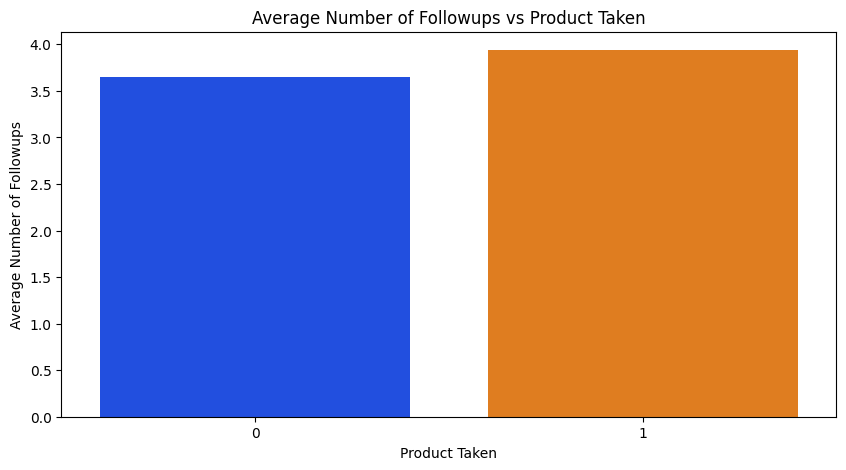

In [253]:
Followups_vs_Prod_Taken=data.groupby("ProdTaken")['NumberOfFollowups'].mean().sort_values(ascending=True)
plt.figure(figsize=(10, 5))
sns.barplot(x=Followups_vs_Prod_Taken.index,
            y=Followups_vs_Prod_Taken.values,palette="bright")
plt.title("Average Number of Followups vs Product Taken")
plt.xlabel("Product Taken")
plt.ylabel("Average Number of Followups")
plt.show()



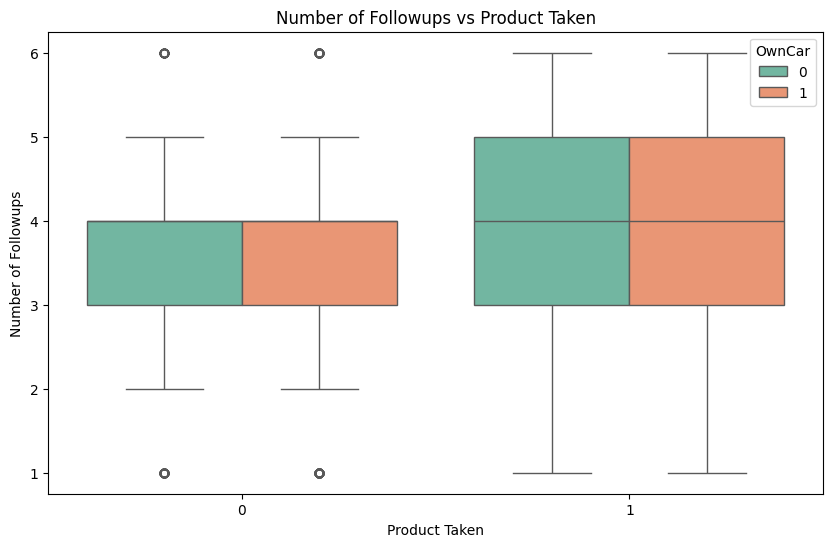

In [254]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="ProdTaken", y="NumberOfFollowups", data=data, hue="OwnCar", palette="Set2")
plt.title("Number of Followups vs Product Taken")
plt.xlabel("Product Taken")
plt.ylabel("Number of Followups")
plt.show()

<Axes: xlabel='ProdTaken', ylabel='count'>

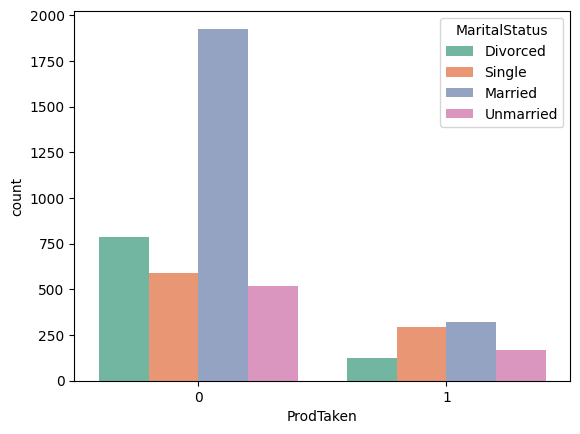

In [255]:
sns.countplot(x="ProdTaken",hue="MaritalStatus",data=data,palette="Set2")


In [256]:
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41,Self Enquiry,3,6,Salaried,Female,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,200001,0,49,Company Invited,1,14,Salaried,Male,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,200002,1,37,Self Enquiry,1,8,Free Lancer,Male,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,200003,0,33,Company Invited,1,9,Salaried,Female,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,200004,0,36,Self Enquiry,1,8,Small Business,Male,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49,Self Enquiry,3,9,Small Business,Male,3,5,Deluxe,4,Unmarried,2,1,1,1,1,Manager,26576
4884,204884,1,28,Company Invited,1,31,Salaried,Male,4,5,Basic,3,Single,3,1,3,1,2,Executive,21212
4885,204885,1,52,Self Enquiry,3,17,Salaried,Female,4,4,Standard,4,Married,7,0,1,1,3,Senior Manager,31820
4886,204886,1,19,Self Enquiry,3,16,Small Business,Male,3,4,Basic,3,Single,3,0,5,0,2,Executive,20289


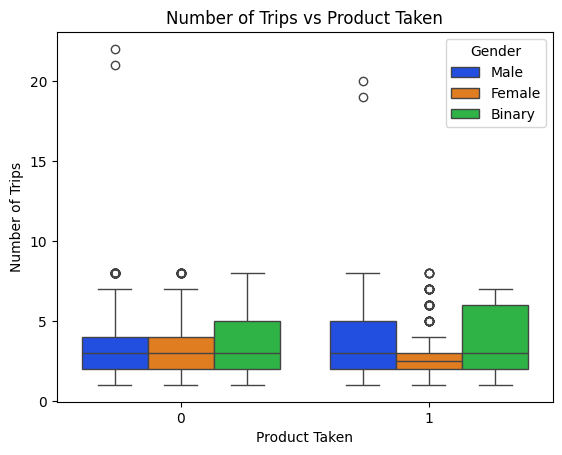

In [257]:
sns.boxplot(x="ProdTaken",y="NumberOfTrips",data=data,hue="Gender",palette="bright")
plt.title("Number of Trips vs Product Taken")
plt.xlabel("Product Taken")
plt.ylabel("Number of Trips")
plt.show()


In [258]:
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41,Self Enquiry,3,6,Salaried,Female,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,200001,0,49,Company Invited,1,14,Salaried,Male,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,200002,1,37,Self Enquiry,1,8,Free Lancer,Male,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,200003,0,33,Company Invited,1,9,Salaried,Female,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,200004,0,36,Self Enquiry,1,8,Small Business,Male,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49,Self Enquiry,3,9,Small Business,Male,3,5,Deluxe,4,Unmarried,2,1,1,1,1,Manager,26576
4884,204884,1,28,Company Invited,1,31,Salaried,Male,4,5,Basic,3,Single,3,1,3,1,2,Executive,21212
4885,204885,1,52,Self Enquiry,3,17,Salaried,Female,4,4,Standard,4,Married,7,0,1,1,3,Senior Manager,31820
4886,204886,1,19,Self Enquiry,3,16,Small Business,Male,3,4,Basic,3,Single,3,0,5,0,2,Executive,20289


<ipython-input-259-c2d25878faa9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pitch_staisfaction_score.index,y=avg_pitch_staisfaction_score.values,palette="bright")


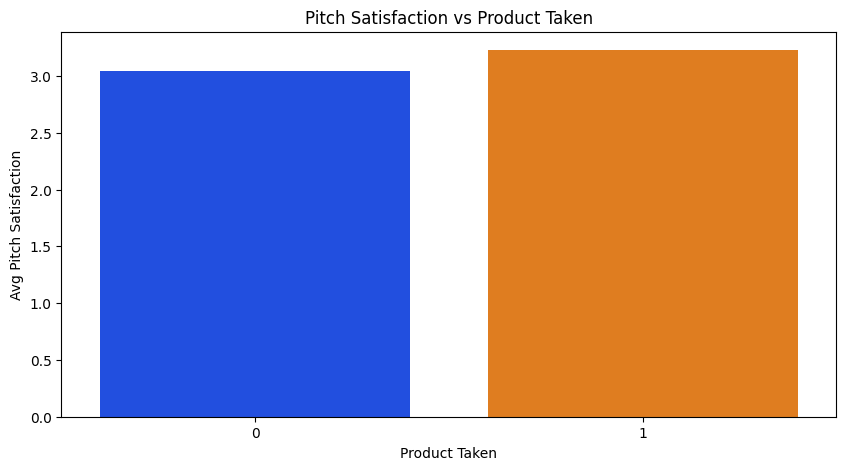

In [259]:
avg_pitch_staisfaction_score=data.groupby("ProdTaken")["PitchSatisfactionScore"].mean().sort_values(ascending=True)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_pitch_staisfaction_score.index,y=avg_pitch_staisfaction_score.values,palette="bright")
plt.title("Pitch Satisfaction vs Product Taken")
plt.xlabel("Product Taken")
plt.ylabel("Avg Pitch Satisfaction")
plt.show()

<ipython-input-260-6359e91ce3e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_monthly_income.index,y=avg_monthly_income.values,palette="Set2")


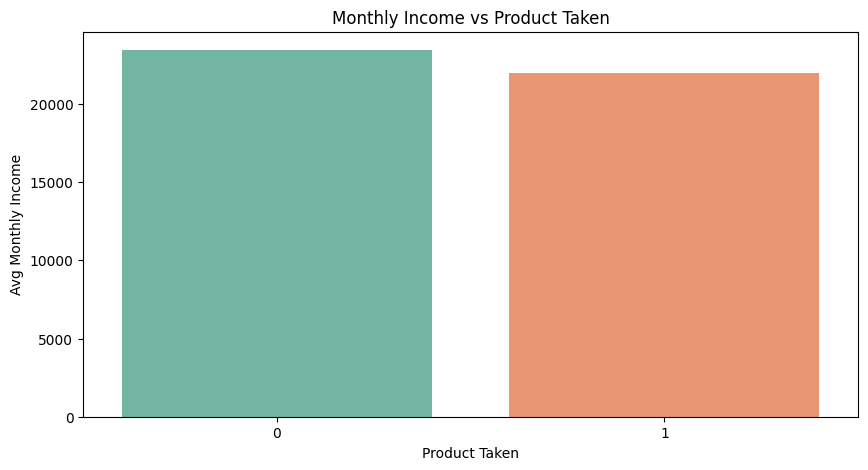

In [260]:
avg_monthly_income=data.groupby("ProdTaken")["MonthlyIncome"].mean().sort_values(ascending=True)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_monthly_income.index,y=avg_monthly_income.values,palette="Set2")
plt.title("Monthly Income vs Product Taken")
plt.xlabel("Product Taken")
plt.ylabel("Avg Monthly Income")
plt.show()

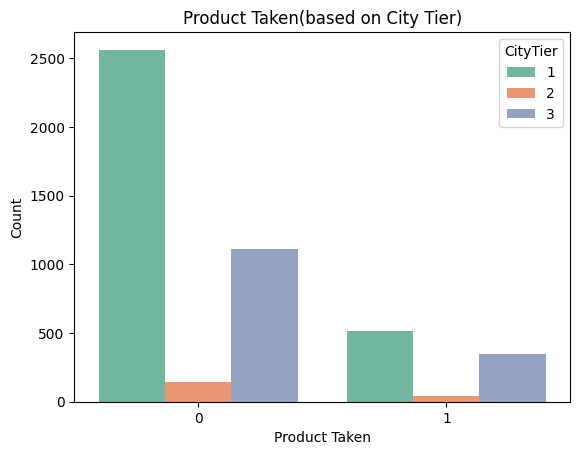

In [261]:
sns.countplot(x="ProdTaken",data=data,hue="CityTier",palette="Set2")
plt.title("Product Taken(based on City Tier)")
plt.xlabel("Product Taken")
plt.ylabel("Count")
plt.show()

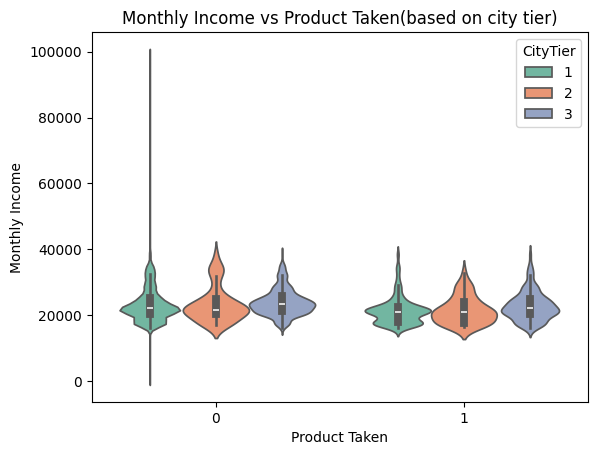

In [262]:
sns.violinplot(x="ProdTaken",y="MonthlyIncome",data=data,hue="CityTier",palette="Set2")
plt.title("Monthly Income vs Product Taken(based on city tier)")
plt.xlabel("Product Taken")
plt.ylabel("Monthly Income")
plt.show()

Feature engineering-Hypothesis Testing and Correlation Analysis


In [263]:
data.drop("CustomerID",axis=1,inplace=True)
data

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41,Self Enquiry,3,6,Salaried,Female,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,0,49,Company Invited,1,14,Salaried,Male,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,1,37,Self Enquiry,1,8,Free Lancer,Male,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,0,33,Company Invited,1,9,Salaried,Female,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,0,36,Self Enquiry,1,8,Small Business,Male,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49,Self Enquiry,3,9,Small Business,Male,3,5,Deluxe,4,Unmarried,2,1,1,1,1,Manager,26576
4884,1,28,Company Invited,1,31,Salaried,Male,4,5,Basic,3,Single,3,1,3,1,2,Executive,21212
4885,1,52,Self Enquiry,3,17,Salaried,Female,4,4,Standard,4,Married,7,0,1,1,3,Senior Manager,31820
4886,1,19,Self Enquiry,3,16,Small Business,Male,3,4,Basic,3,Single,3,0,5,0,2,Executive,20289


In [264]:
data.isnull().sum()

,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0
ProductPitched,0


Hypothesis Testing

In [265]:
import pandas as pd
from scipy.stats import chi2_contingency
product_taken_vs_occupation = pd.crosstab(data['ProdTaken'], data['Occupation'])
chi2, p, dof, expected = chi2_contingency(product_taken_vs_occupation)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
alpha=0.05
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between Product Taken and Occupation.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Product Taken and Occupation.")

Chi-squared statistic: 32.228324225529214
P-value: 4.6845205307718225e-07
Degrees of freedom: 3
Expected frequencies:
[[1.61676900e+00 3.49222105e+02 1.85362566e+03 1.61353546e+03]
 [3.83230997e-01 8.27778954e+01 4.39374338e+02 3.82464535e+02]]
Reject the null hypothesis. There is a significant association between Product Taken and Occupation.


In [266]:
data.isnull().sum()

,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0
ProductPitched,0


In [267]:
product_taken_vs_gender = pd.crosstab(data['ProdTaken'], data['Gender'])
chi2, p, dof, expected = chi2_contingency(product_taken_vs_gender)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between Product Taken and Gender.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Product Taken and Gender.")


Chi-squared statistic: 5.504716588488492
P-value: 0.06377727812896922
Degrees of freedom: 2
Expected frequencies:
[[ 125.29959771 1425.18187593 2267.51852636]
 [  29.70040229  337.81812407  537.48147364]]
Fail to reject the null hypothesis. There is no significant association between Product Taken and Gender.


In [268]:
product_taken_vs_product_pitched = pd.crosstab(data['ProdTaken'], data['ProductPitched'])
chi2, p, dof, expected = chi2_contingency(product_taken_vs_product_pitched)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between Product Taken and Product Pitched.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Product Taken and Product Pitched.")

Chi-squared statistic: 232.18744296263625
P-value: 4.463453205770491e-49
Degrees of freedom: 4
Expected frequencies:
[[1476.91848401 1386.37941986  119.6409062   599.01291552  236.0482744 ]
 [ 350.08151599  328.62058014   28.3590938   141.98708448   55.9517256 ]]
Reject the null hypothesis. There is a significant association between Product Taken and Product Pitched.


In [269]:
product_taken_vs_designation = pd.crosstab(data['ProdTaken'], data['Designation'])
chi2, p, dof, expected = chi2_contingency(product_taken_vs_designation)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between Product Taken and Designation.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Product Taken and Designation.")

Chi-squared statistic: 232.18744296263625
P-value: 4.463453205770491e-49
Degrees of freedom: 4
Expected frequencies:
[[ 236.0482744  1476.91848401 1386.37941986  599.01291552  119.6409062 ]
 [  55.9517256   350.08151599  328.62058014  141.98708448   28.3590938 ]]
Reject the null hypothesis. There is a significant association between Product Taken and Designation.


In [270]:
product_taken_vs_marital_status = pd.crosstab(data['ProdTaken'], data['MaritalStatus'])
chi2, p, dof, expected = chi2_contingency(product_taken_vs_marital_status)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between Product Taken and Marital Status.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Product Taken and Marital Status.")

Chi-squared statistic: 182.11372482906518
P-value: 3.083073789707628e-39
Degrees of freedom: 3
Expected frequencies:
[[ 734.82151175 1816.43997459  715.42028372  551.31822994]
 [ 174.17848825  430.56002541  169.57971628  130.68177006]]
Reject the null hypothesis. There is a significant association between Product Taken and Marital Status.


In [271]:
from scipy import stats
columns=["Age","DurationOfPitch","MonthlyIncome","NumberOfTrips","NumberOfChildrenVisiting","PreferredPropertyStar","NumberOfFollowups","PitchSatisfactionScore"]
results = {}
group_0 = data[data['ProdTaken'] == 0]
group_1 = data[data['ProdTaken'] == 1]

for column in columns:
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(group_0[column].dropna(), group_1[column].dropna())

    results[column] = {
        't_statistic': t_stat,
        'p_value': p_value,
        'mean_group_0': group_0[column].mean(),
        'mean_group_1': group_1[column].mean(),
        'std_group_0': group_0[column].std(),
        'std_group_1': group_1[column].std()
    }

print(results)

for column, result in results.items():
    print(f"\nResults for {column}:")
    if result['p_value'] < 0.05:
        print("There is a statistically significant difference between the two groups.")
        if result['mean_group_0'] > result['mean_group_1']:
            print("The group that didn't take the product has a significantly higher mean.")
        else:
            print("The group that took the product has a significantly higher mean.")
    else:
        print(" There is no statistically significant difference between the two groups.")


{'Age': {'t_statistic': 9.769294303454078, 'p_value': 2.479271841420221e-22, 'mean_group_0': 37.89811419591409, 'mean_group_1': 34.67513812154696, 'std_group_0': 8.716405871294006, 'std_group_1': 9.748751372721554}, 'DurationOfPitch': {'t_statistic': -5.132721744149587, 'p_value': 2.9704635007391757e-07, 'mean_group_0': 15.122577265584075, 'mean_group_1': 16.70497237569061, 'std_group_0': 8.341836033492308, 'std_group_1': 8.325660543057122}, 'MonthlyIncome': {'t_statistic': 8.335871340973991, 'p_value': 9.981858291940836e-17, 'mean_group_0': 23446.642221058144, 'mean_group_1': 21978.529281767955, 'std_group_0': 4875.3537665255635, 'std_group_1': 4259.946329156541}, 'NumberOfTrips': {'t_statistic': -1.1084412383628002, 'p_value': 0.26772776836738094, 'mean_group_0': 3.2236773179675224, 'mean_group_1': 3.299447513812155, 'std_group_0': 1.7994104040095837, 'std_group_1': 2.0448104299473213}, 'NumberOfChildrenVisiting': {'t_statistic': -0.7801624270174103, 'p_value': 0.43533438679784053, '

In [272]:
data

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41,Self Enquiry,3,6,Salaried,Female,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,0,49,Company Invited,1,14,Salaried,Male,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,1,37,Self Enquiry,1,8,Free Lancer,Male,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,0,33,Company Invited,1,9,Salaried,Female,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,0,36,Self Enquiry,1,8,Small Business,Male,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49,Self Enquiry,3,9,Small Business,Male,3,5,Deluxe,4,Unmarried,2,1,1,1,1,Manager,26576
4884,1,28,Company Invited,1,31,Salaried,Male,4,5,Basic,3,Single,3,1,3,1,2,Executive,21212
4885,1,52,Self Enquiry,3,17,Salaried,Female,4,4,Standard,4,Married,7,0,1,1,3,Senior Manager,31820
4886,1,19,Self Enquiry,3,16,Small Business,Male,3,4,Basic,3,Single,3,0,5,0,2,Executive,20289


In [273]:
data.isnull().sum()

,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0
ProductPitched,0


In [274]:
data.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [275]:
X = data.select_dtypes(exclude=["object", "category"]).drop(columns=["ProdTaken", "Passport", "OwnCar"])
y=data["ProdTaken"]

In [276]:
X.head()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome
0,41,3,6,3,3,3,1,2,0,20993
1,49,1,14,3,4,4,2,3,2,20130
2,37,1,8,3,4,3,7,3,0,17090
3,33,1,9,2,3,3,2,5,1,17909
4,36,1,8,2,3,4,1,5,0,18468


In [277]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((3306, 10), (1417, 10))

In [278]:
X_train.corr()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome
Age,1.000000,-0.000895,-0.021132,0.007531,-0.022719,-0.006575,0.200042,0.000581,-0.014913,0.447946
CityTier,-0.000895,1.000000,0.019585,-0.005159,0.021778,-0.008486,-0.024596,-0.023762,-0.003655,0.076579
DurationOfPitch,-0.021132,0.019585,1.000000,0.067086,0.020549,0.003004,0.015334,-0.004528,0.040442,0.006537
NumberOfPersonVisiting,0.007531,-0.005159,0.067086,1.000000,0.312536,0.016627,0.190058,-0.018423,0.602774,0.164171
NumberOfFollowups,-0.022719,0.021778,0.020549,0.312536,1.000000,-0.032132,0.129896,0.008238,0.271184,0.157679
PreferredPropertyStar,-0.006575,-0.008486,0.003004,0.016627,-0.032132,1.000000,0.004172,-0.033923,0.021975,0.004398
NumberOfTrips,0.200042,-0.024596,0.015334,0.190058,0.129896,0.004172,1.000000,-0.019780,0.156160,0.151290
PitchSatisfactionScore,0.000581,-0.023762,-0.004528,-0.018423,0.008238,-0.033923,-0.019780,1.000000,0.011361,0.037810
NumberOfChildrenVisiting,-0.014913,-0.003655,0.040442,0.602774,0.271184,0.021975,0.156160,0.011361,1.000000,0.170473
MonthlyIncome,0.447946,0.076579,0.006537,0.164171,0.157679,0.004398,0.151290,0.037810,0.170473,1.000000


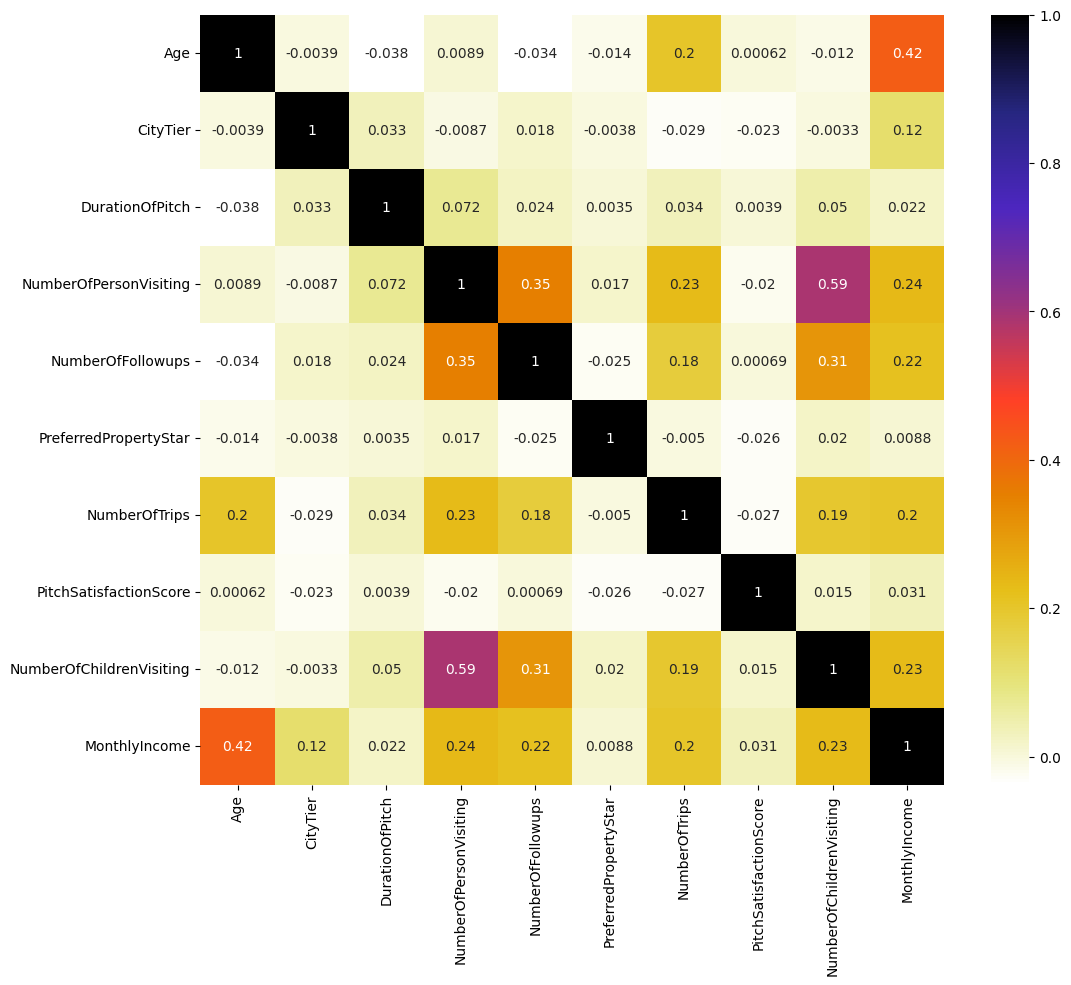

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using Spearman's Rank Correlation
plt.figure(figsize=(12, 10))
cor = X_train.corr(method='spearman')  # Specify Spearman's method
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [280]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [281]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

0

In [282]:
data.isnull().sum()

,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0
ProductPitched,0


In [283]:
data

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41,Self Enquiry,3,6,Salaried,Female,3,3,Deluxe,3,Single,1,1,2,1,0,Manager,20993
1,0,49,Company Invited,1,14,Salaried,Male,3,4,Deluxe,4,Divorced,2,0,3,1,2,Manager,20130
2,1,37,Self Enquiry,1,8,Free Lancer,Male,3,4,Basic,3,Single,7,1,3,0,0,Executive,17090
3,0,33,Company Invited,1,9,Salaried,Female,2,3,Basic,3,Divorced,2,1,5,1,1,Executive,17909
4,0,36,Self Enquiry,1,8,Small Business,Male,2,3,Basic,4,Divorced,1,0,5,1,0,Executive,18468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49,Self Enquiry,3,9,Small Business,Male,3,5,Deluxe,4,Unmarried,2,1,1,1,1,Manager,26576
4884,1,28,Company Invited,1,31,Salaried,Male,4,5,Basic,3,Single,3,1,3,1,2,Executive,21212
4885,1,52,Self Enquiry,3,17,Salaried,Female,4,4,Standard,4,Married,7,0,1,1,3,Senior Manager,31820
4886,1,19,Self Enquiry,3,16,Small Business,Male,3,4,Basic,3,Single,3,0,5,0,2,Executive,20289


In [284]:

from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(drop=None)

encoded_data = encoder.fit_transform(data[['Occupation','Gender','ProductPitched','MaritalStatus','Designation']]).toarray()

# Convert to a DataFrame and add back to the original data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Occupation','Gender','ProductPitched','MaritalStatus','Designation']),index=data.index)
print("Encoded Data: ",encoded_df.shape)
print("Original Data:",data.shape)
data=data.drop(["Occupation","Gender","ProductPitched","MaritalStatus","Designation"],axis=1)
data = pd.concat([data, encoded_df], axis=1)
print(data.shape)
print(data.isnull().sum())


Encoded Data:  (4723, 21)
Original Data: (4723, 19)
(4723, 35)
ProdTaken                      0
Age                            0
TypeofContact                  0
CityTier                       0
DurationOfPitch                0
NumberOfPersonVisiting         0
NumberOfFollowups              0
PreferredPropertyStar          0
NumberOfTrips                  0
Passport                       0
PitchSatisfactionScore         0
OwnCar                         0
NumberOfChildrenVisiting       0
MonthlyIncome                  0
Occupation_Free Lancer         0
Occupation_Large Business      0
Occupation_Salaried            0
Occupation_Small Business      0
Gender_Binary                  0
Gender_Female                  0
Gender_Male                    0
ProductPitched_Basic           0
ProductPitched_Deluxe          0
ProductPitched_King            0
ProductPitched_Standard        0
ProductPitched_Super Deluxe    0
MaritalStatus_Divorced         0
MaritalStatus_Married          0
MaritalStatus

In [285]:

# num = data.select_dtypes(include=np.number).drop(columns=['ProdTaken'], errors='ignore')
# print(num.columns)

In [286]:

# from sklearn.preprocessing import OneHotEncoder

# # Initialize the encoder
# encoder = OneHotEncoder(drop=None)

# encoded_data = encoder.fit_transform(cat).toarray()

# # Convert to a DataFrame and add back to the original data
# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(),index=cat.index)
# print("Encoded Data: ",encoded_df.shape)
# print("Original Data:",data.shape)

# new_data = pd.concat([encoded_df, num], axis=1)
# print(new_data.shape)
# print(new_data.isnull().sum())
data.isnull().sum()

,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
NumberOfPersonVisiting,0
NumberOfFollowups,0
PreferredPropertyStar,0
NumberOfTrips,0
Passport,0


In [287]:
data = data.astype(int, errors='ignore')
data

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41,Self Enquiry,3,6,3,3,3,1,1,...,0,0,0,1,0,0,0,1,0,0
1,0,49,Company Invited,1,14,3,4,4,2,0,...,0,1,0,0,0,0,0,1,0,0
2,1,37,Self Enquiry,1,8,3,4,3,7,1,...,0,0,0,1,0,0,1,0,0,0
3,0,33,Company Invited,1,9,2,3,3,2,1,...,0,1,0,0,0,0,1,0,0,0
4,0,36,Self Enquiry,1,8,2,3,4,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49,Self Enquiry,3,9,3,5,4,2,1,...,0,0,0,0,1,0,0,1,0,0
4884,1,28,Company Invited,1,31,4,5,3,3,1,...,0,0,0,1,0,0,1,0,0,0
4885,1,52,Self Enquiry,3,17,4,4,4,7,0,...,0,0,1,0,0,0,0,0,1,0
4886,1,19,Self Enquiry,3,16,3,4,3,3,0,...,0,0,0,1,0,0,1,0,0,0


In [288]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to a column (e.g., Gender)

data['TypeofContact'] = label_encoder.fit_transform(data['TypeofContact'])
data

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41,1,3,6,3,3,3,1,1,...,0,0,0,1,0,0,0,1,0,0
1,0,49,0,1,14,3,4,4,2,0,...,0,1,0,0,0,0,0,1,0,0
2,1,37,1,1,8,3,4,3,7,1,...,0,0,0,1,0,0,1,0,0,0
3,0,33,0,1,9,2,3,3,2,1,...,0,1,0,0,0,0,1,0,0,0
4,0,36,1,1,8,2,3,4,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49,1,3,9,3,5,4,2,1,...,0,0,0,0,1,0,0,1,0,0
4884,1,28,0,1,31,4,5,3,3,1,...,0,0,0,1,0,0,1,0,0,0
4885,1,52,1,3,17,4,4,4,7,0,...,0,0,1,0,0,0,0,0,1,0
4886,1,19,1,3,16,3,4,3,3,0,...,0,0,0,1,0,0,1,0,0,0


In [289]:
from sklearn.preprocessing import StandardScaler
numerical_cols = [
    "Age",
    "DurationOfPitch",
    "MonthlyIncome",
    "NumberOfTrips",
    "NumberOfChildrenVisiting",
    "PreferredPropertyStar",
    "NumberOfFollowups",
    "PitchSatisfactionScore",
    "CityTier"
]
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data.isnull().sum()


,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
NumberOfPersonVisiting,0
NumberOfFollowups,0
PreferredPropertyStar,0
NumberOfTrips,0
Passport,0


In [290]:
data.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome', 'Occupation_Free Lancer',
       'Occupation_Large Business', 'Occupation_Salaried',
       'Occupation_Small Business', 'Gender_Binary', 'Gender_Female',
       'Gender_Male', 'ProductPitched_Basic', 'ProductPitched_Deluxe',
       'ProductPitched_King', 'ProductPitched_Standard',
       'ProductPitched_Super Deluxe', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Unmarried', 'Designation_AVP', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP'],
      dtype='object')

In [291]:
data["MonthlyIncome"]

,MonthlyIncome
0,-0.452796
1,-0.632679
2,-1.266331
3,-1.095620
4,-0.979103
...,...
4883,0.710914
4884,-0.407148
4885,1.803964
4886,-0.599537


In [292]:
target=data["ProdTaken"]
target.reset_index(drop=True)
data.drop("ProdTaken",axis=1,inplace=True)
print(data.shape)
print(target)

(4723, 34)
0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4723, dtype: int64


In [293]:
from sklearn.decomposition import PCA


Transformed PCA Data:
            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.079851 -1.665827  1.469746 -0.325373 -1.362087 -0.436149 -0.282864   
1     0.484776  0.139060 -0.338058  0.383902 -0.080424  0.227911 -0.541930   
2    -0.893696  0.450737 -1.442730 -0.176622 -0.848702 -1.268996  1.923549   
3    -1.916599  0.074298 -1.320479 -1.229141 -0.435243  0.627806  0.015103   
4    -2.353464 -0.725305 -1.168848 -0.261619 -0.342026  1.360514 -0.224311   
...        ...       ...       ...       ...       ...       ...       ...   
4718  1.329118 -0.809085  1.865652  0.851767 -1.242107 -0.310762 -0.773721   
4719  0.131683  2.546185 -0.100604 -0.953386  1.583628 -0.629830 -0.664224   
4720  3.940288  0.123083  0.715086  1.497785 -0.187918 -0.817441  0.467185   
4721 -0.853065  1.793331  1.133777 -1.654276 -0.212112  1.126719  0.605999   
4722  0.436692  1.494771 -0.780975  0.459854 -0.059306  0.237281 -0.679346   

           PC8       PC9      PC10  
0  

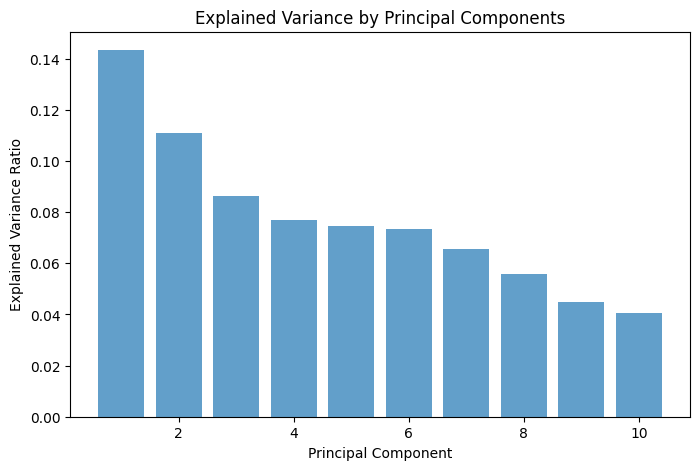

In [294]:


# Step 2: Apply PCA
pca = PCA(n_components=10)  # Reduce to 2 principal components
pca_data = pca.fit_transform(data)

# Step 3: Create a DataFrame of the transformed data
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

# Display the principal components
print("Transformed PCA Data:\n", pca_df)

# Step 4: Visualize the explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
print("\nExplained Variance Ratios:", explained_variance)
print("Cumulative Explained Variance:", cumulative_explained_variance)

# Plotting the explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# # Optional: Scatterplot of PCA components
# sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100)
# plt.title('PCA Visualization')
# plt.show()

In [295]:
pca_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.079851,-1.665827,1.469746,-0.325373,-1.362087,-0.436149,-0.282864,-0.174008,0.530207,0.463926
1,0.484776,0.139060,-0.338058,0.383902,-0.080424,0.227911,-0.541930,-0.473315,1.812076,1.008994
2,-0.893696,0.450737,-1.442730,-0.176622,-0.848702,-1.268996,1.923549,1.104466,-0.579029,0.324568
3,-1.916599,0.074298,-1.320479,-1.229141,-0.435243,0.627806,0.015103,-0.421721,-0.101149,0.274851
4,-2.353464,-0.725305,-1.168848,-0.261619,-0.342026,1.360514,-0.224311,0.327314,-0.266232,0.640226
...,...,...,...,...,...,...,...,...,...,...
4718,1.329118,-0.809085,1.865652,0.851767,-1.242107,-0.310762,-0.773721,0.880692,0.498168,1.050295
4719,0.131683,2.546185,-0.100604,-0.953386,1.583628,-0.629830,-0.664224,0.384083,-0.209502,-0.054454
4720,3.940288,0.123083,0.715086,1.497785,-0.187918,-0.817441,0.467185,-0.966071,-1.111913,0.162729
4721,-0.853065,1.793331,1.133777,-1.654276,-0.212112,1.126719,0.605999,-0.347091,-1.406631,-0.227379


In [296]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     4723 non-null   float64
 1   PC2     4723 non-null   float64
 2   PC3     4723 non-null   float64
 3   PC4     4723 non-null   float64
 4   PC5     4723 non-null   float64
 5   PC6     4723 non-null   float64
 6   PC7     4723 non-null   float64
 7   PC8     4723 non-null   float64
 8   PC9     4723 non-null   float64
 9   PC10    4723 non-null   float64
dtypes: float64(10)
memory usage: 369.1 KB


In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4723 entries, 0 to 4887
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          4723 non-null   float64
 1   TypeofContact                4723 non-null   int64  
 2   CityTier                     4723 non-null   float64
 3   DurationOfPitch              4723 non-null   float64
 4   NumberOfPersonVisiting       4723 non-null   int64  
 5   NumberOfFollowups            4723 non-null   float64
 6   PreferredPropertyStar        4723 non-null   float64
 7   NumberOfTrips                4723 non-null   float64
 8   Passport                     4723 non-null   int64  
 9   PitchSatisfactionScore       4723 non-null   float64
 10  OwnCar                       4723 non-null   int64  
 11  NumberOfChildrenVisiting     4723 non-null   float64
 12  MonthlyIncome                4723 non-null   float64
 13  Occupation_Free Lancer 

In [298]:
target.isnull().sum()

0

In [299]:
# prompt: please concat target and pca_df

# Concatenate target and pca_df
final_df = pd.concat([pca_df, target.reset_index(drop=True)], axis=1)

final_df.isnull().sum()

,0
PC1,0
PC2,0
PC3,0
PC4,0
PC5,0
PC6,0
PC7,0
PC8,0
PC9,0
PC10,0


In [300]:
final_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,ProdTaken
0,-1.079851,-1.665827,1.469746,-0.325373,-1.362087,-0.436149,-0.282864,-0.174008,0.530207,0.463926,1
1,0.484776,0.139060,-0.338058,0.383902,-0.080424,0.227911,-0.541930,-0.473315,1.812076,1.008994,0
2,-0.893696,0.450737,-1.442730,-0.176622,-0.848702,-1.268996,1.923549,1.104466,-0.579029,0.324568,1
3,-1.916599,0.074298,-1.320479,-1.229141,-0.435243,0.627806,0.015103,-0.421721,-0.101149,0.274851,0
4,-2.353464,-0.725305,-1.168848,-0.261619,-0.342026,1.360514,-0.224311,0.327314,-0.266232,0.640226,0
...,...,...,...,...,...,...,...,...,...,...,...
4718,1.329118,-0.809085,1.865652,0.851767,-1.242107,-0.310762,-0.773721,0.880692,0.498168,1.050295,1
4719,0.131683,2.546185,-0.100604,-0.953386,1.583628,-0.629830,-0.664224,0.384083,-0.209502,-0.054454,1
4720,3.940288,0.123083,0.715086,1.497785,-0.187918,-0.817441,0.467185,-0.966071,-1.111913,0.162729,1
4721,-0.853065,1.793331,1.133777,-1.654276,-0.212112,1.126719,0.605999,-0.347091,-1.406631,-0.227379,1


In [301]:


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'final_df' and 'target' are defined as in your previous code

# Separate features (X) and target variable (y)
X = final_df.drop('ProdTaken', axis=1)
y = final_df['ProdTaken']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42,class_weight='balanced')

# Define hyperparameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,10,15],
    'min_samples_split': [5, 10,15],
    'min_samples_leaf': [2, 5,10],
    'ccp_alpha': [0.01, 0.1, 0.5]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
best_dt_classifier = grid_search.best_estimator_

y_train_pred = best_dt_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy}")
# Make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Train Accuracy: 0.7207517204870302
Test Accuracy: 0.7216931216931217
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       751
           1       0.35      0.41      0.38       194

    accuracy                           0.72       945
   macro avg       0.60      0.61      0.60       945
weighted avg       0.74      0.72      0.73       945

Best Hyperparameters: {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [304]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Separate features (X) and target variable (y)
X = final_df.drop('ProdTaken', axis=1)
y = final_df['ProdTaken']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform initial Random Forest training to compute feature importances
rf_initial = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_initial.fit(X_train, y_train)

# Select features with importance > 0.01
feature_importances = pd.Series(rf_initial.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.01].index

# Filter training and testing sets for important features
X_train = X_train[important_features]
X_test = X_test[important_features]

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define hyperparameter grid for RandomizedSearch
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10,20],
    'min_samples_leaf': [ 2, 4,8],
    'max_features': ['sqrt', 'log2']
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Get the best estimator from RandomizedSearchCV
best_rf_classifier = random_search.best_estimator_

# Make predictions on the training and test sets
y_train_pred = best_rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_pred = best_rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Evaluate the model
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(classification_report(y_test, y_pred))

# Print best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)


Train Accuracy: 0.9984118581259925
Test Accuracy: 0.8835978835978836
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       774
           1       0.81      0.47      0.59       171

    accuracy                           0.88       945
   macro avg       0.85      0.72      0.76       945
weighted avg       0.88      0.88      0.87       945

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}


In [312]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are defined (your dataset)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost Classifier with a Decision Tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner
ada_boost_classifier = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Define the hyperparameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'estimator__max_depth': [1, 2],  # Corrected prefix for base estimator hyperparameters
    'estimator__min_samples_split': [5, 10],
    'estimator__min_samples_leaf': [2, 5],
}

# Perform GridSearchCV
grid_search_ada = GridSearchCV(estimator=ada_boost_classifier, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search_ada.fit(X_train, y_train)

# Get the best model and make predictions
best_ada_classifier = grid_search_ada.best_estimator_

y_pred = best_ada_classifier.predict(X_test)
y_train_pred = best_ada_classifier.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy}")
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")
print(classification_report(y_test, y_pred))
print("Best Hyperparameters:", grid_search_ada.best_params_)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Train Accuracy: 0.8144520910534675
Test Accuracy: 0.8264550264550264
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       774
           1       0.71      0.07      0.13       171

    accuracy                           0.83       945
   macro avg       0.77      0.53      0.52       945
weighted avg       0.81      0.83      0.76       945

Best Hyperparameters: {'estimator__max_depth': 2, 'estimator__min_samples_leaf': 5, 'estimator__min_samples_split': 5, 'learning_rate': 0.2, 'n_estimators': 100}


In [315]:

# #XGBOOST

# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# from sklearn.decomposition import PCA
# from sklearn.metrics import accuracy_score, classification_report
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV



# # Separate features (X) and target variable (y)
# X = final_df.drop('ProdTaken', axis=1)
# y = final_df['ProdTaken']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize XGBoost Classifier
# xgb_classifier = xgb.XGBClassifier(random_state=42)

# # Define hyperparameter grid for tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of boosting rounds
#     'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevents overfitting
#     'max_depth': [3, 5, 7],  # Maximum depth of a tree
#     'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
#     'colsample_bytree': [0.8, 0.9, 1.0]  # Subsample ratio of columns when constructing each tree

# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best estimator from GridSearchCV
# best_xgb_classifier = grid_search.best_estimator_

# # Make predictions on the test set
# y_pred = best_xgb_classifier.predict(X_test)

# # Evaluate the model
# y_train_pred = best_xgb_classifier.predict(X_train)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# print(f"Train Accuracy: {train_accuracy}")

# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy}")
# print(classification_report(y_test, y_pred))

# # Print best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'